## Процесс решения задачи

Решение почти любой DS задачи в продуктовой аналитике можно разбить на следующие этапы:

1) Проанализировать задачу, понять к какому виду и классу обучения она относится. Вместе с бизнесом выбрать метрику

2) EDA (exploratory data analysis) - процесс когда мы изучаем качество данных, признаки, их распределение и связь с целевой(целевыми переменными)

3) Предобработка данных (обработка пропусков, кодирование/создание новых признаков, очистка данных от выбросов и т.д.)

4) Обучение и оптимизация моделей

5) Валидация результатов

## Данные и задача

Рассмотрим все этапы выше на примере задачи прогноза LTV пользователя.


## Введение в Data Science
## Урок 5. Пайплайн исследования данных. Интерпретация моделей для бизнеса
## Домашнее задание
Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:
1. провести исследовательский анализ данных,
2. визуализировать результаты и сделать из них выводы,
3. провести предобработку признаков (возможно создать новые),
4. обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,
5. оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,
6. проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).

Данные <br>
В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

Описание данных:
* Customer - идентификатор пользователя
* State - штат
* Customer Lifetime Value - LTV пользователя
* Response - взаимодействие с рекламой
* Coverage - тип страхового покрытия
* Education - образование
* Effective to date - срок действия страховки
* EmploymentStatus - трудоустройство
* Gender - пол
* Income - доход
* Location code - тип местности в которой проживает пользователь
* Marital Status - семейное положение
* Monthly Premium Auto
* Months Since Last Claim - месяцев с последнего требования по выплате компенсации
* Months Since Policy Inception - месяцев с открытия страховки
* Number of Open Complaints - количество незакрытых жалоб
* Number of Policies - количество полисов
* Policy Type - тип страховки
* Policy - страховка
* Renew Offer Type - обновленный тип предложения
* Sales Channel - канал продаж
* Total Claim Amount - сумма выплаченных компенсаций
* Vehicle Class - класс автомобиля
* Vehicle Size - размер автомобиля

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Посмотрим на наши данные:

In [2]:
df = pd.read_csv('LTV.csv')
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Пропусков данных нет.

Типы данных: float64(2), int64(6), object(16)

## Разделим признаки на численные и категориальные

In [4]:
num_cols = []
str_cols = []

cols_and_type = df.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else:
        str_cols.append(col)

print(num_cols)

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [5]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Customer Lifetime Value': dtype('float64'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [6]:
df[num_cols].describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

8 видов количественных признаков

In [7]:
df[str_cols].describe()
# df.describe(include = 'object') # можно и так

Customer       State Response Coverage Education Effective To Date  \
count      9134        9134     9134     9134      9134              9134   
unique     9134           5        2        3         5                59   
top     Y167826  California       No    Basic  Bachelor           1/10/11   
freq          1        3150     7826     5568      2748               195   

       EmploymentStatus Gender Location Code Marital Status    Policy Type  \
count              9134   9134          9134           9134           9134   
unique                5      2             3              3              3   
top            Employed      F      Suburban        Married  Personal Auto   
freq               5698   4658          5779           5298           6788   

             Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
count          9134             9134          9134           9134         9134  
unique            9                4             4              6            3  
top     Personal L3           Offer1         Agent  Four-Door Car      Medsize  
freq           3426             3752          3477           4621         6424

16 категориальных признака

Customer - идентификатор пользователя - уникален.


## Построим графики, посмотрим на распределение признаков

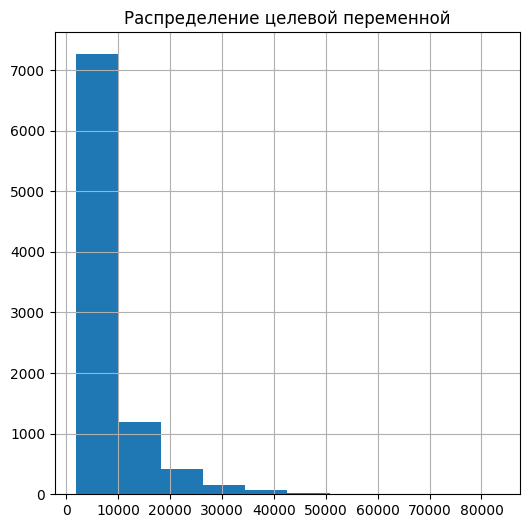

In [8]:
plt.figure(figsize = (6, 6))
plt.title('Распределение целевой переменной')
df['Customer Lifetime Value'].hist()

plt.show()

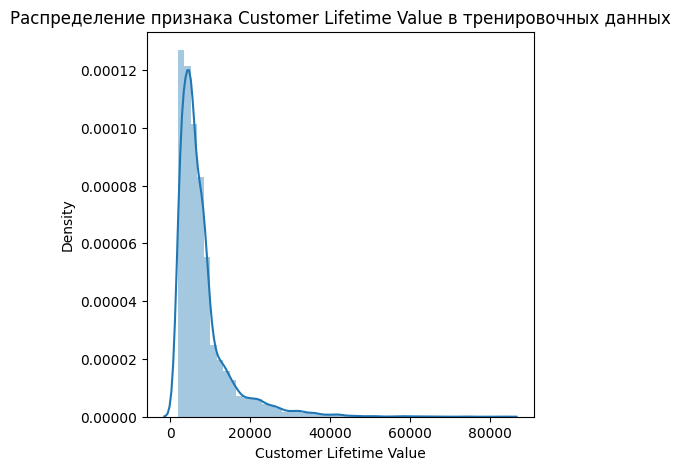

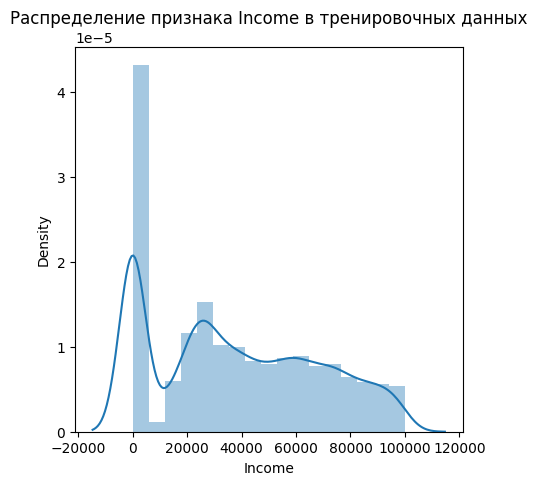

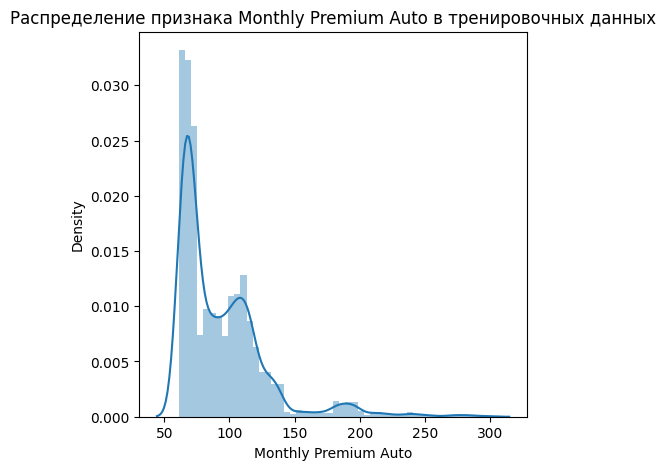

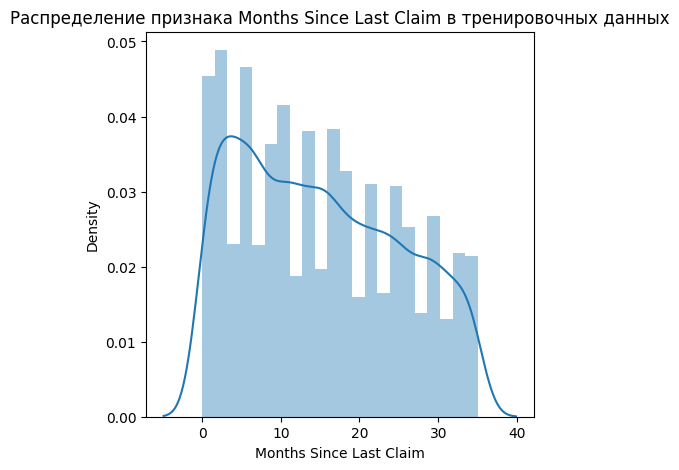

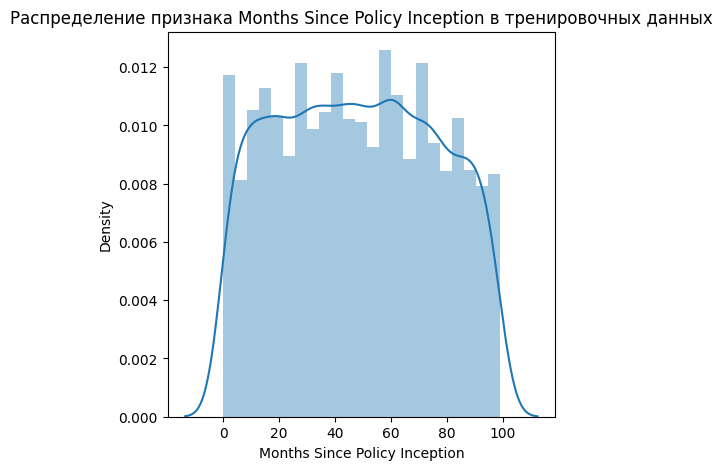

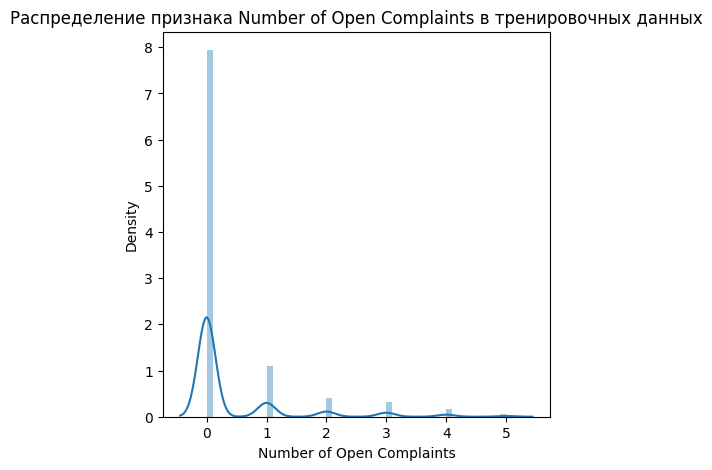

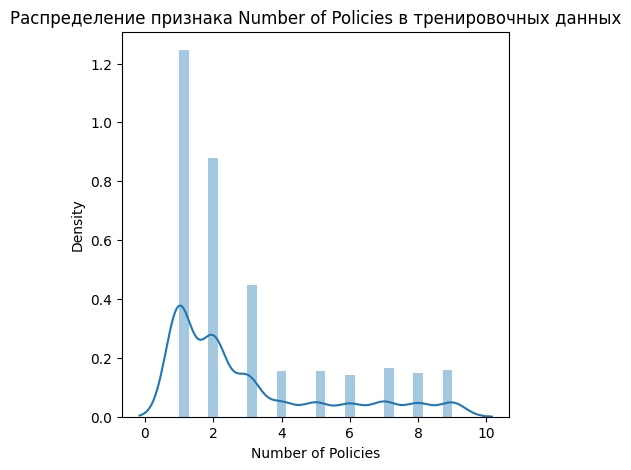

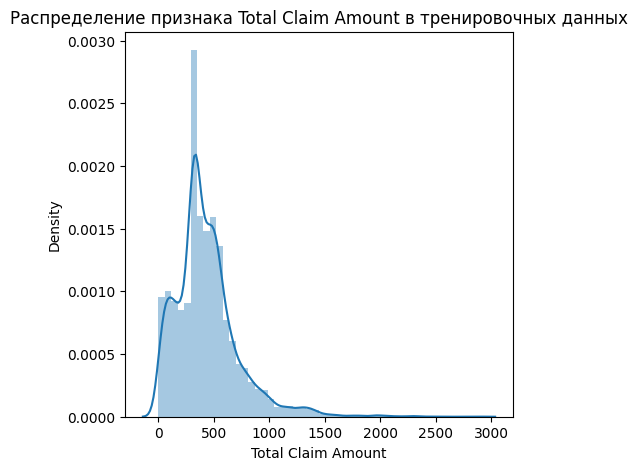

In [9]:
for col in num_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(df[col])

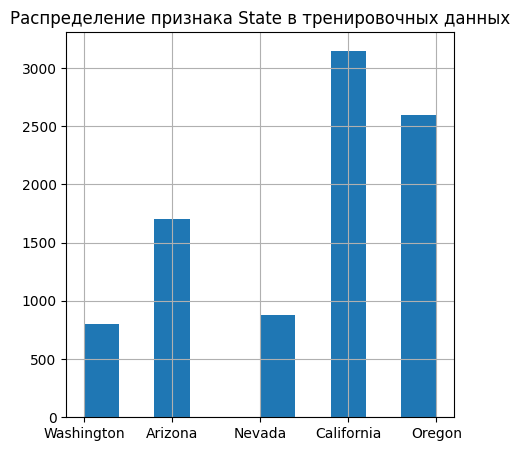

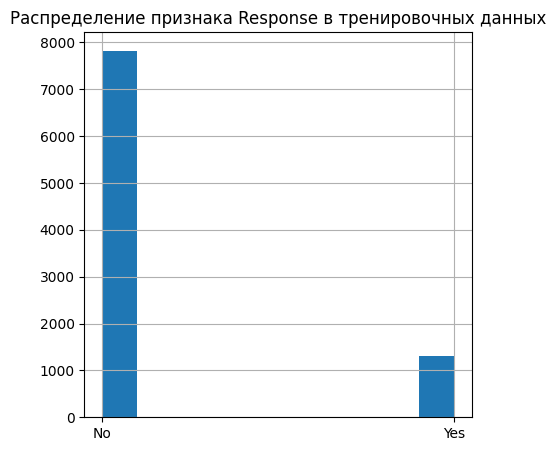

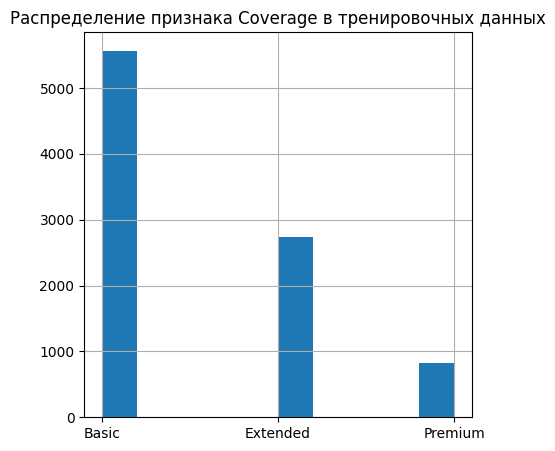

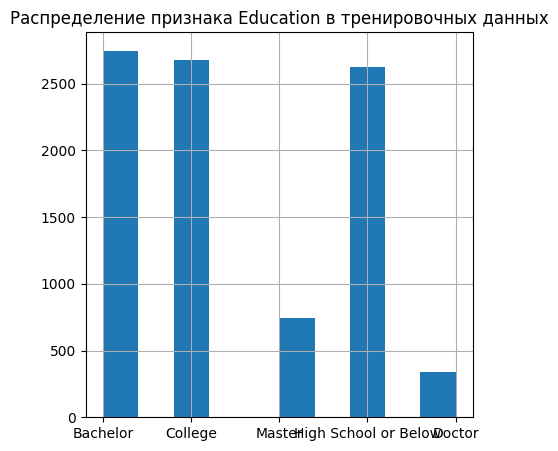

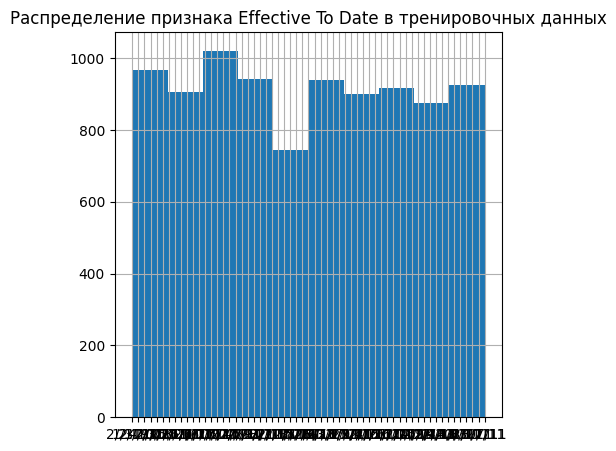

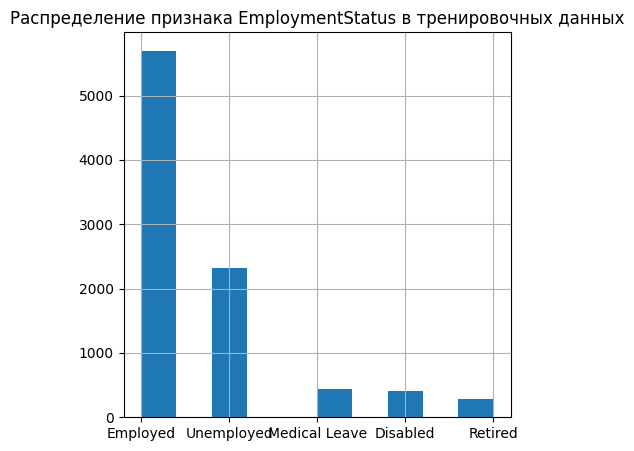

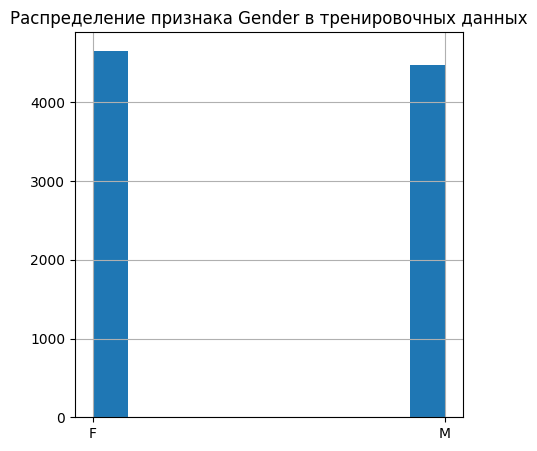

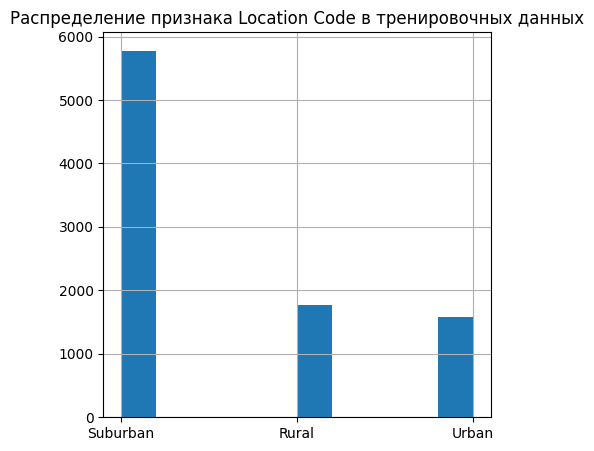

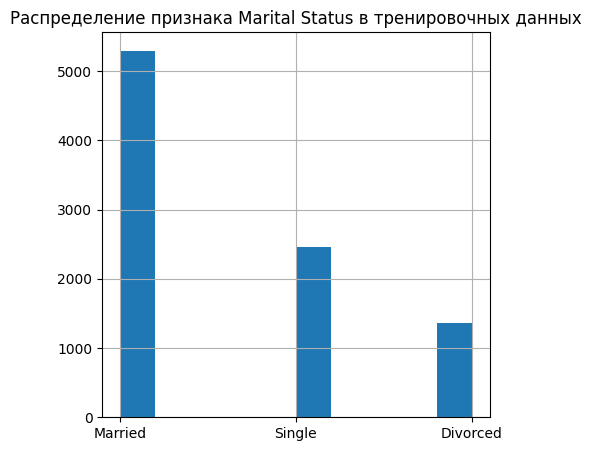

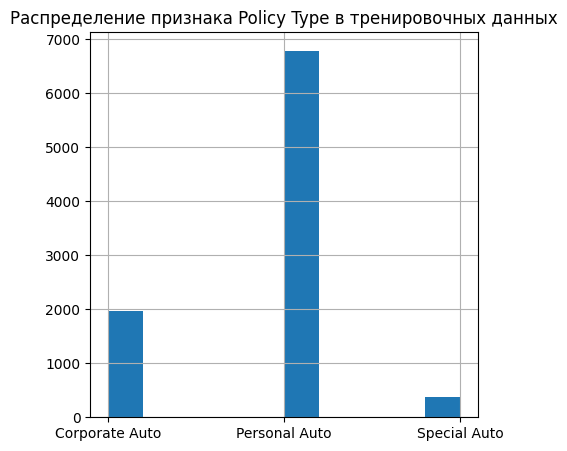

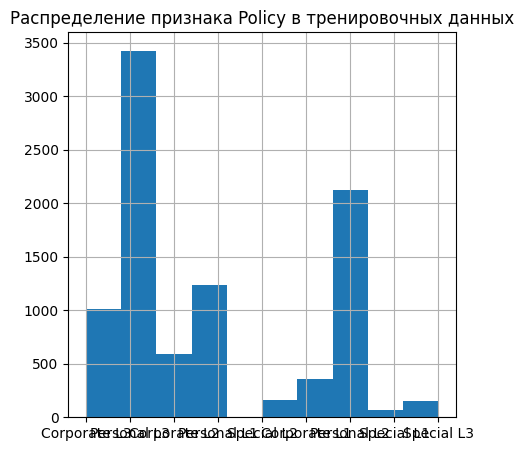

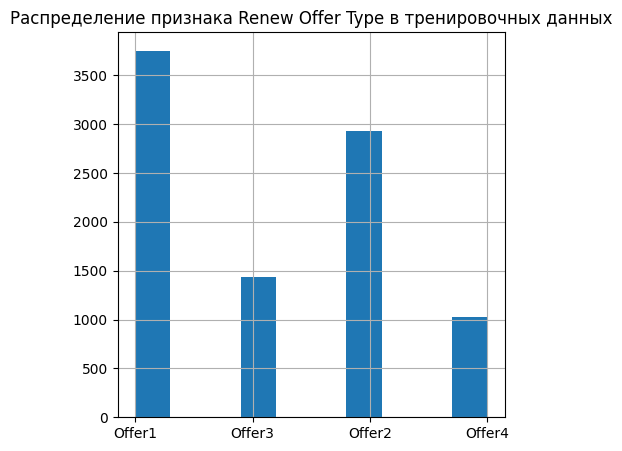

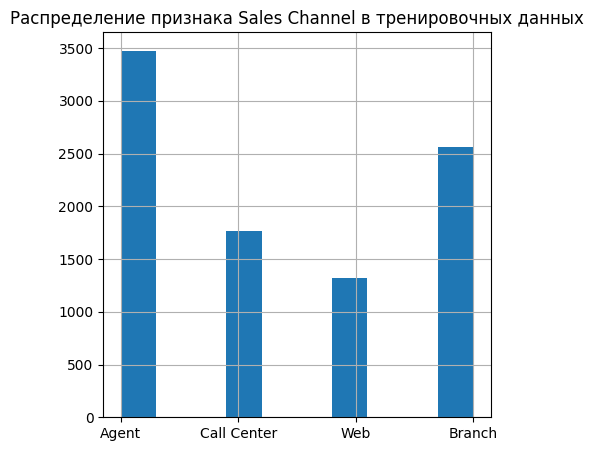

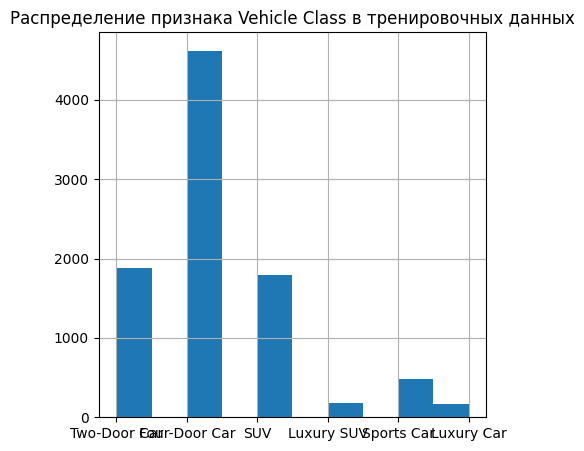

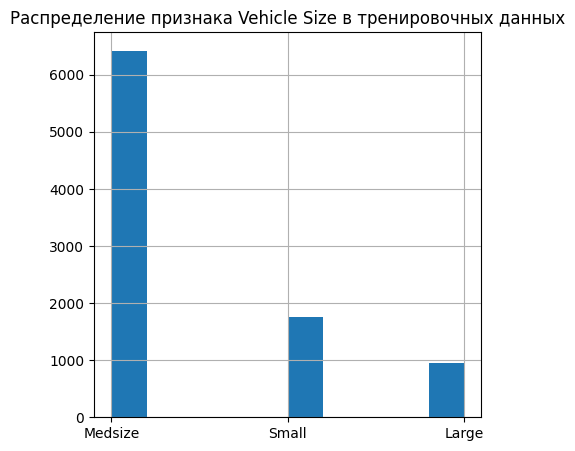

In [10]:
for col in str_cols[1:]:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    df[col].hist()

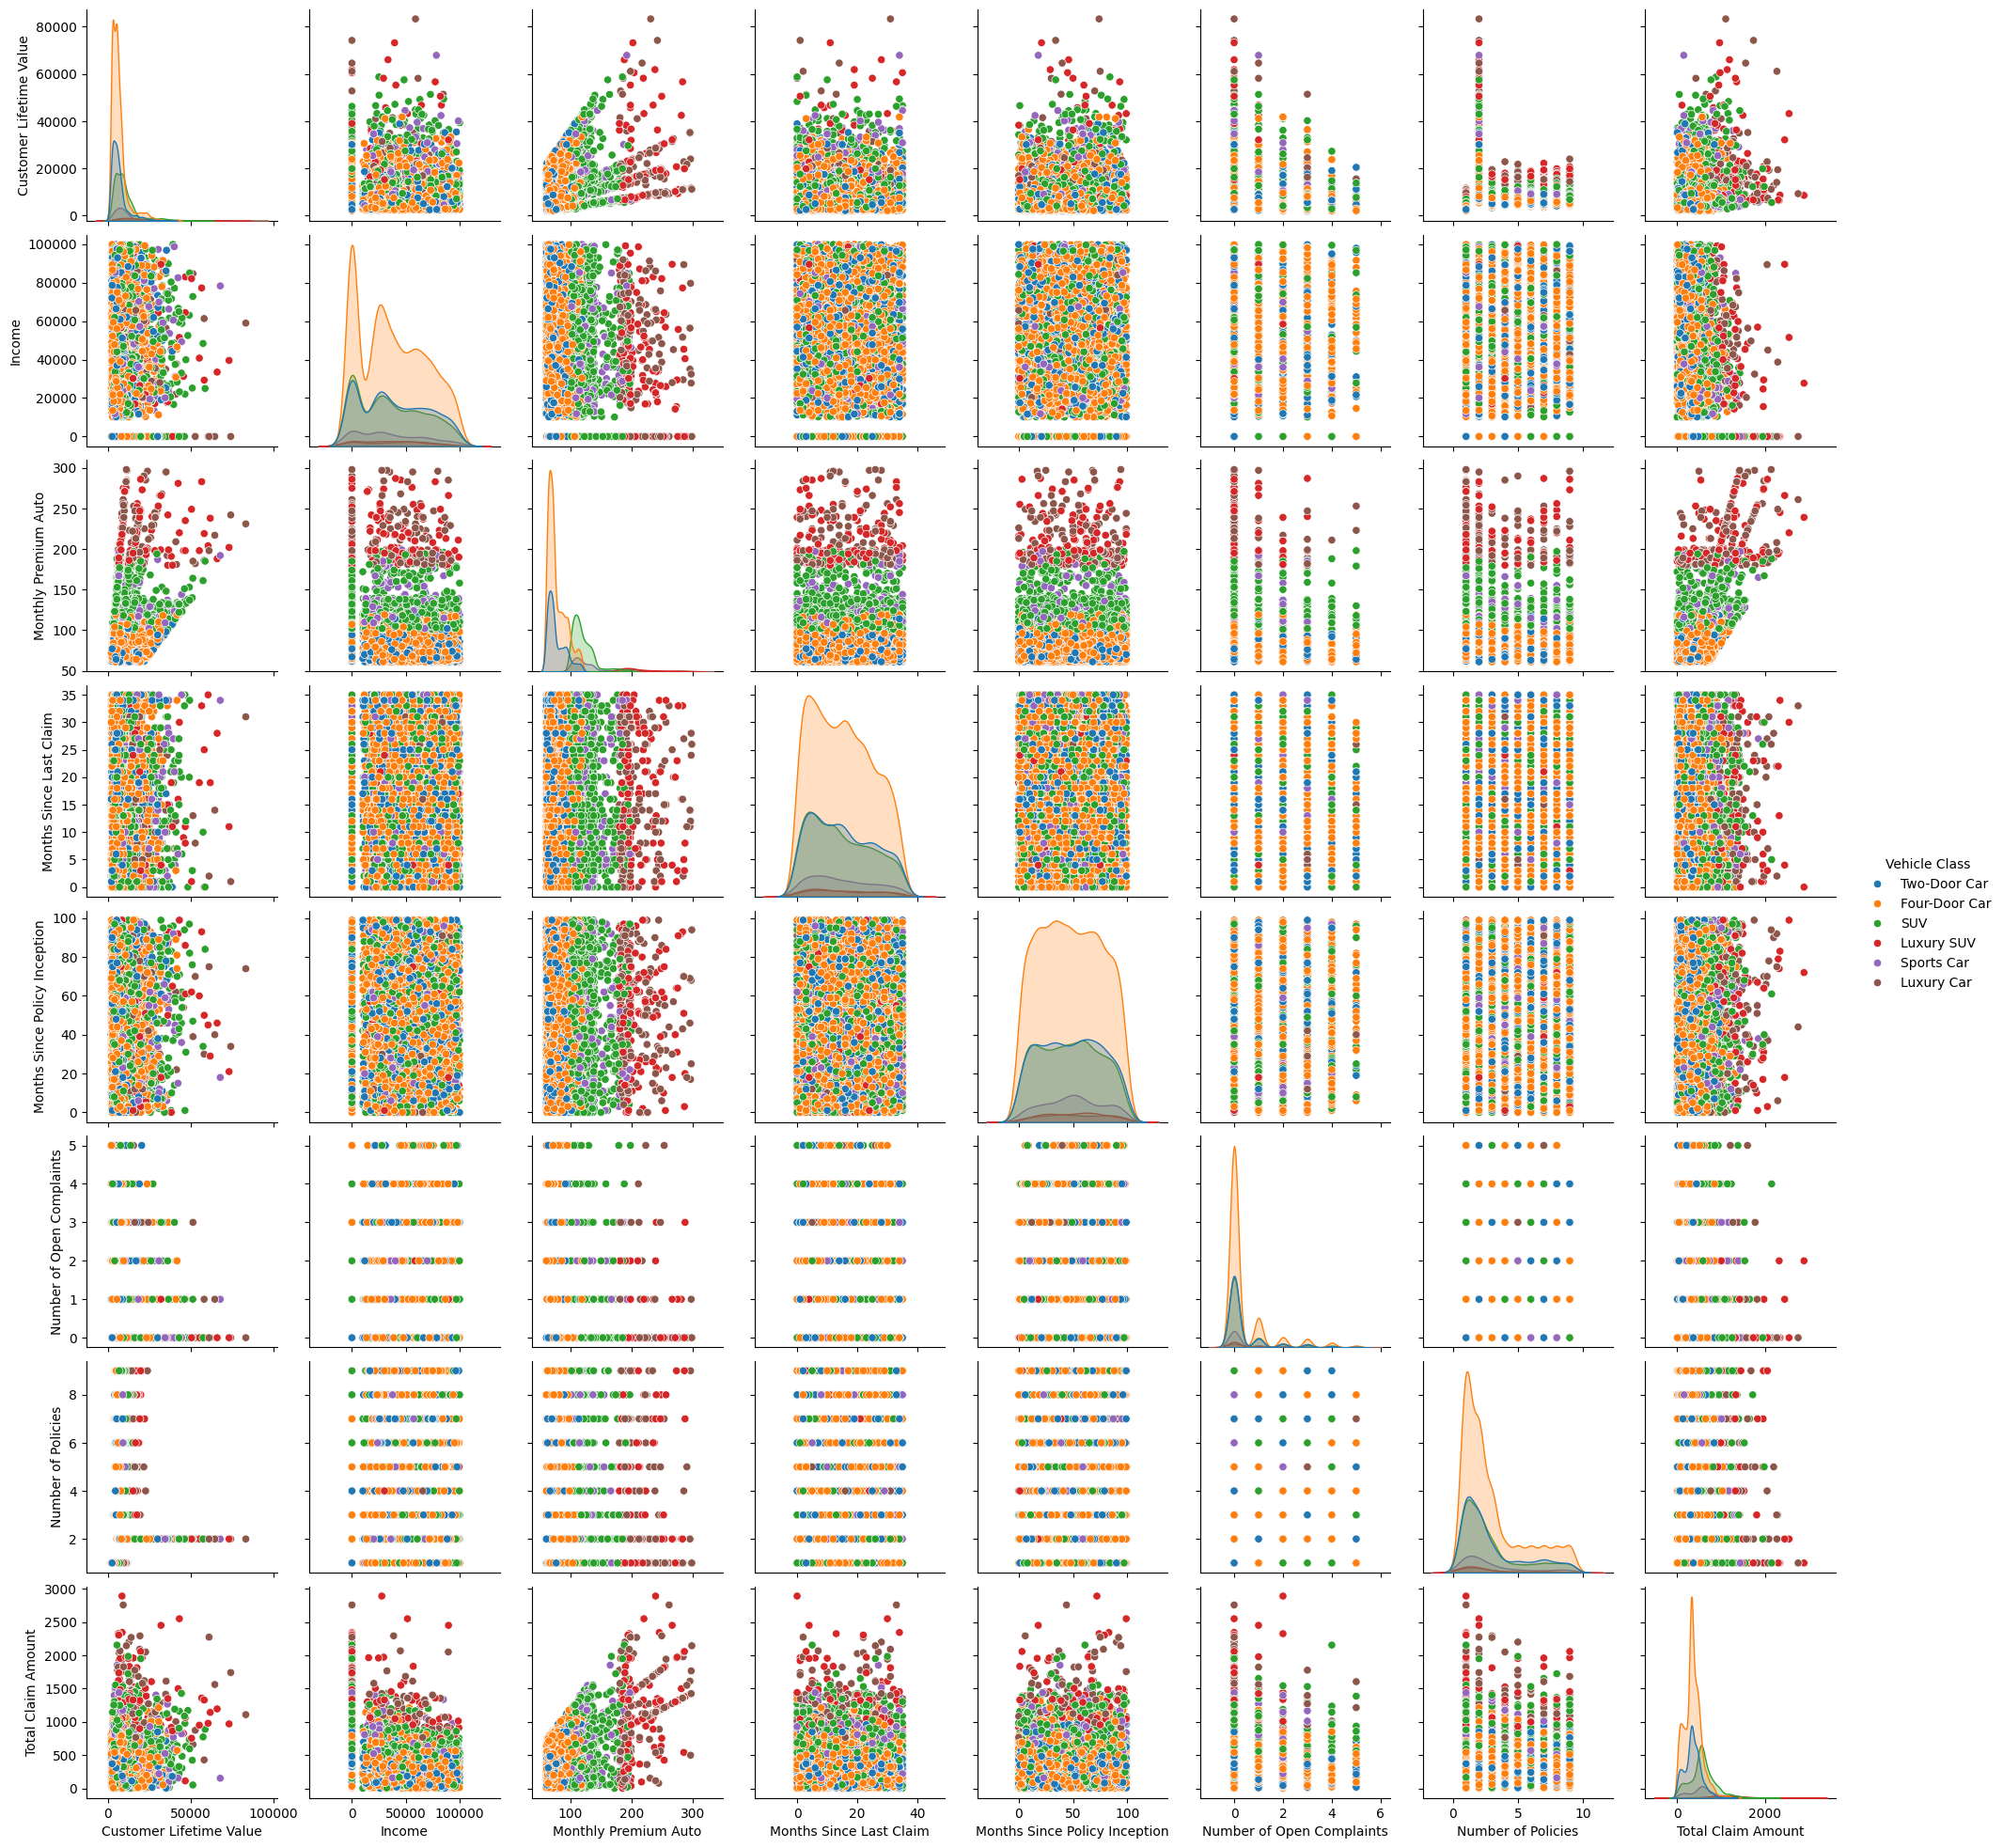

In [10]:
# репрезентация данных в виде графиков (зависимость от признака Vehicle Class - класс автомобиля)
g = sns.pairplot(df.drop("Customer", axis=1), hue="Vehicle Class") # Coverage")

## Визуализация и предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

Поэтому сначала предобработаем признаки, а потом уже поделим на тренировочную и тестовую выборки.

У наc 16 категориальных признаков.

Customer - идентификатор пользователя - уникальный идентификатор и не несёт никакой полезной информации.

Effective to date - срок действия страховки - не несёт полезной информации.

Удалим эти признаки из df.

In [11]:
df.shape

(9134, 24)

In [52]:
df.drop(columns=['Customer', 'Effective To Date'], inplace=True)

In [ ]:
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

In [15]:
str_cols.remove('Customer')
str_cols.remove('Effective To Date')

In [16]:
df1.shape

(9134, 22)

!!!!!!!!!

Значительную часть работы на этапе EDA занимает поиск взаимосвязей между различными признаками. Очевидно что признаки и значения признаков, оказывающие основное влияние на целевой, интересуют нас сильнее, чем прочие, по ним лучше всего и предсказывать значение целевого. Одним из способов оценить влияние значений категориальных признаков (число значений такого признака подразумевается конечным) на целевой — density plot, например, используя модуль seaborn.

Density plot можно представить себе как сглаженную гистограмму, потому что она показывает распределение одного значения категориально признака. Раскрасим распределения разными цветами и посмотрим на распределения. Код ниже строит density plot LTV пользователя. Разными цветами показаны рейтинги различных Coverage - типов страхового покрытия (рассмотрены типы с как минимум сотней записей в нашем наборе):

In [17]:
# Create a list of buildings with more than 100 measurements
types = df['Coverage'].value_counts()
types = list(types[types.values > 100].index)

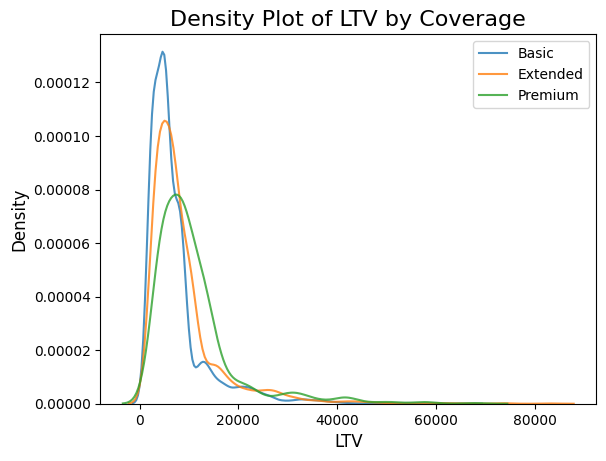

In [18]:
# Plot each building
for b_type in types:
    # Select the building type
    subset = df[df['Coverage'] == b_type]
    # Density plot of LTV
    sns.kdeplot(subset['Customer Lifetime Value'],
               label = b_type, shade = False, alpha = 0.8);
# label the plot
plt.xlabel('LTV', size = 12); plt.ylabel('Density', size = 12);
plt.title('Density Plot of LTV by Coverage', size = 16);
plt.legend()

Видно, что Coverage - тип страхового покрытия оказывает влияние на LTV пользователя. Получается, такой признак, как тип страхового покрытия, для нас важен. Так как это признак категориальный, нам ещё предстоит преобразовать (закодировать).

То же самое посмотрим для всех 6 количественных признаков:

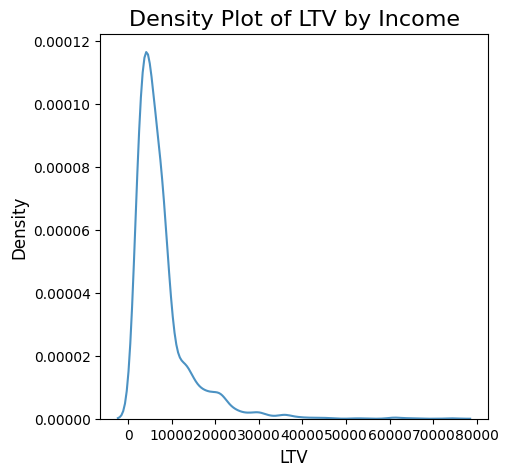

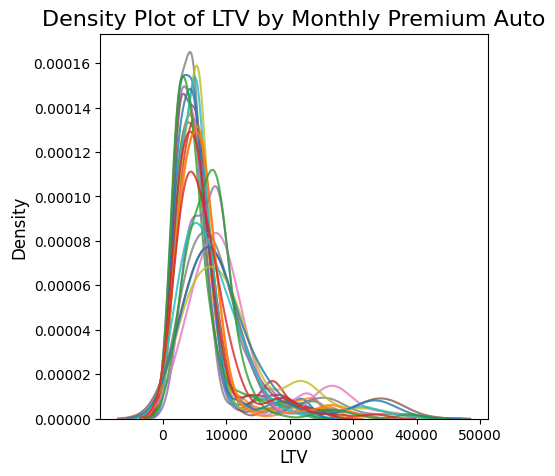

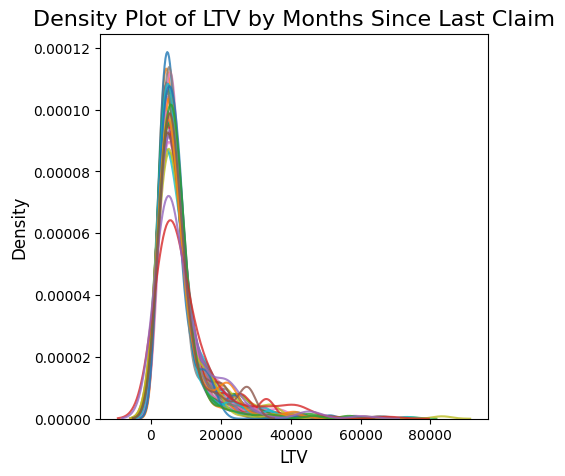

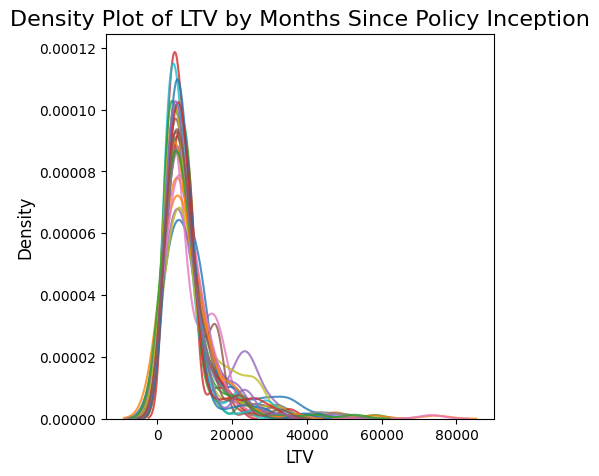

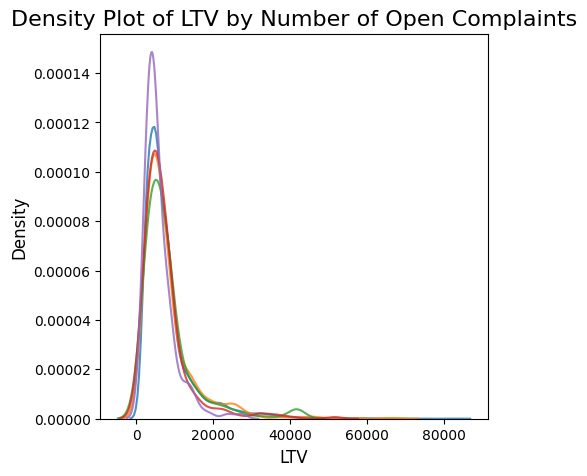

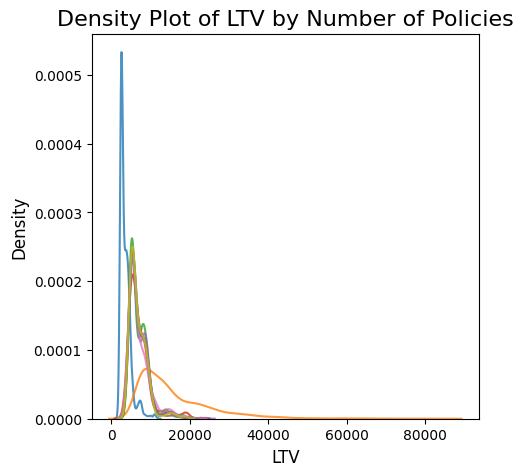

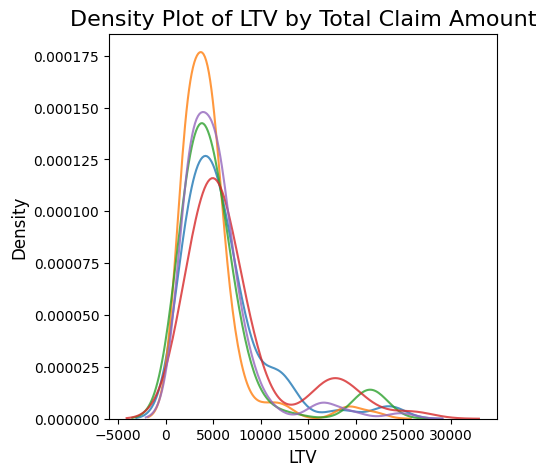

In [24]:
for col in num_cols[1:]:
    plt.figure(figsize = (5, 5))

    # Create a list of buildings with more than 100 measurements
    types = df[col].value_counts()
    types = list(types[types.values > 100].index)
    for b_type in types:
        # Select the building type
        subset = df[df[col] == b_type]
        # Density plot of LTV
        sns.kdeplot(subset['Customer Lifetime Value'],
                  label = b_type, shade = False, alpha = 0.8);
    # label the plot
    plt.xlabel('LTV', size = 12); plt.ylabel('Density', size = 12);
    plt.title(f'Density Plot of LTV by {col}', size = 16);
    # plt.legend()

In [25]:
num_cols

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

Из 6-ти оставшихся количественных признаков
2 не оказывают заметного влияния на целевую LTV:
* Months Since Last Claim - месяцев с последнего требования по выплате компенсации
* Months Since Policy Inception - месяцев с открытия страховки

Удалим 2 лишние неинформативные фичи из df1.

In [27]:
df1.drop(columns=['Months Since Last Claim', 'Months Since Policy Inception'], inplace=True)
df1.shape

(9134, 20)

In [46]:
num_cols1 = num_cols.copy()

In [47]:
num_cols1.remove('Months Since Last Claim')
num_cols1.remove('Months Since Policy Inception')

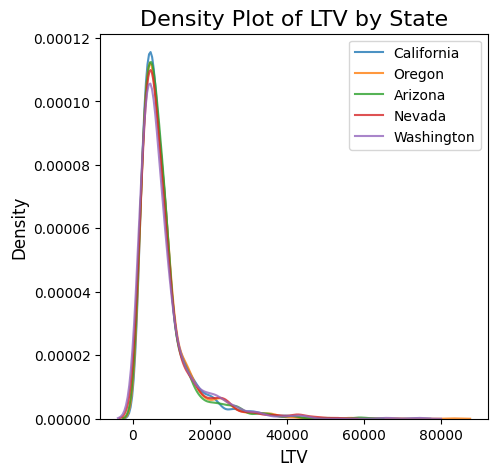

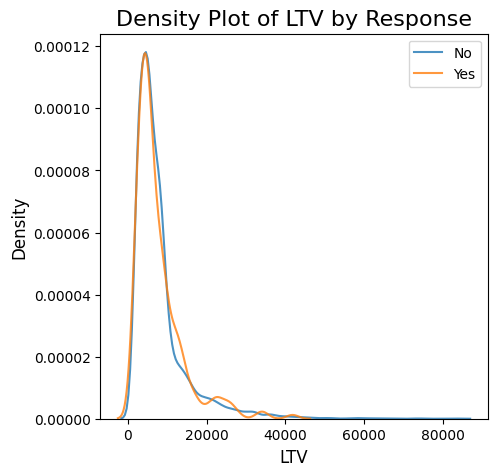

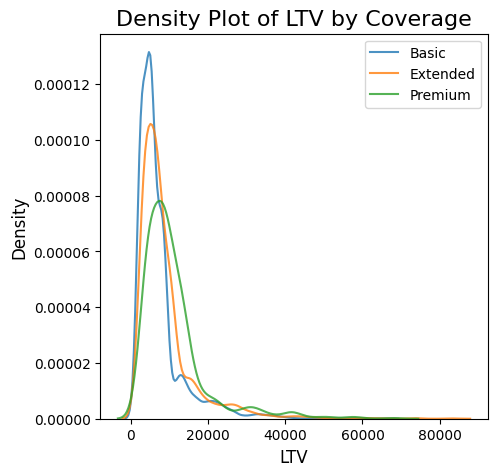

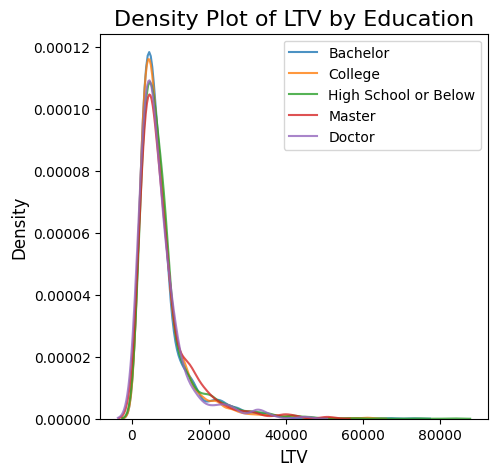

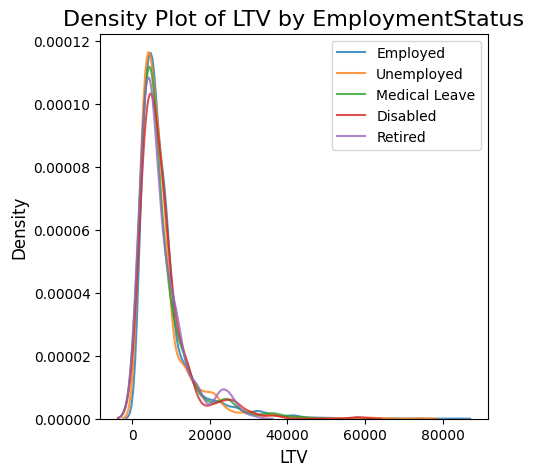

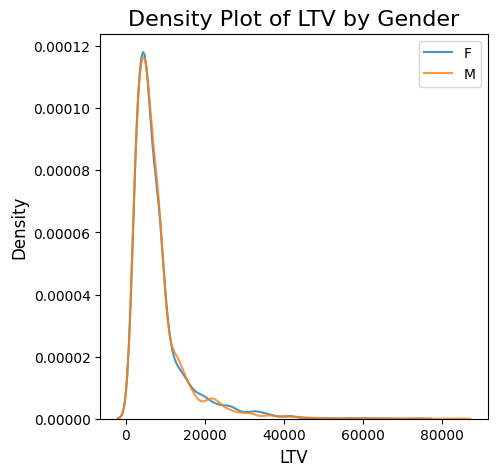

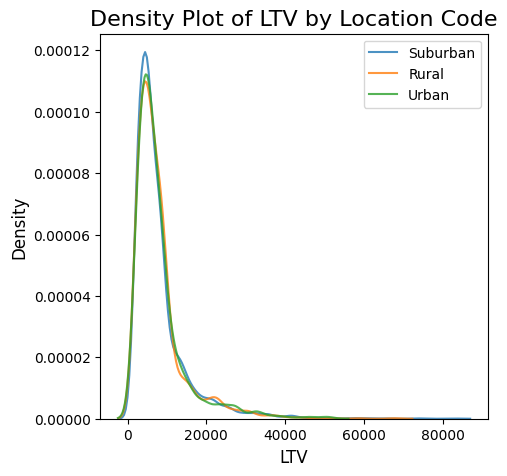

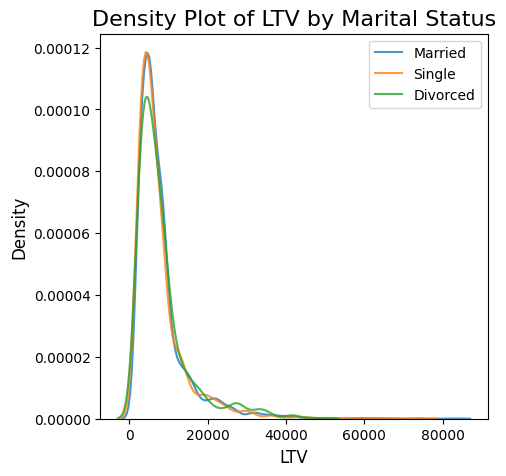

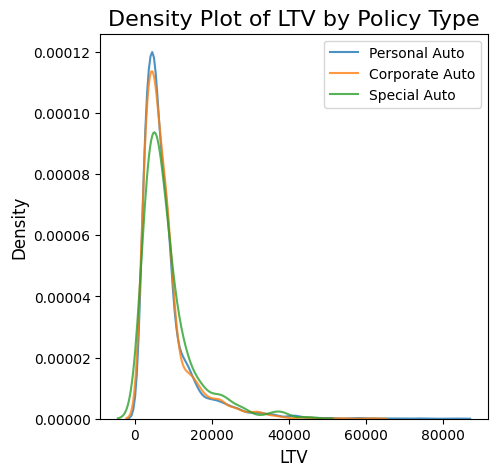

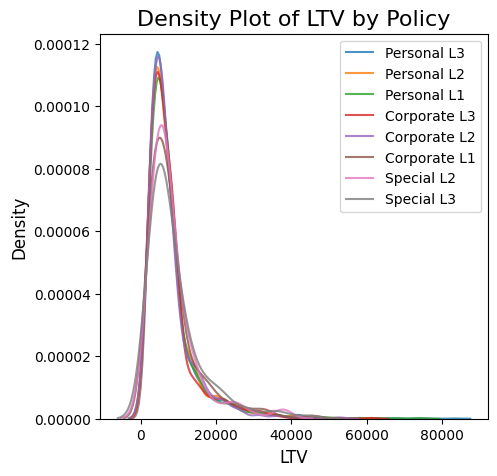

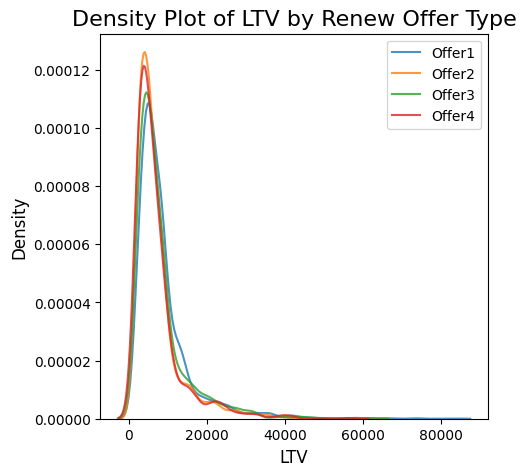

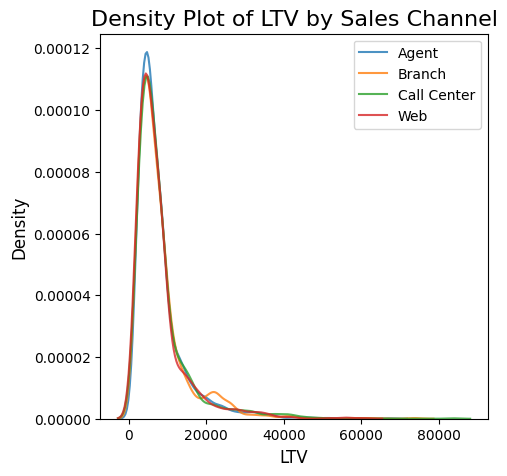

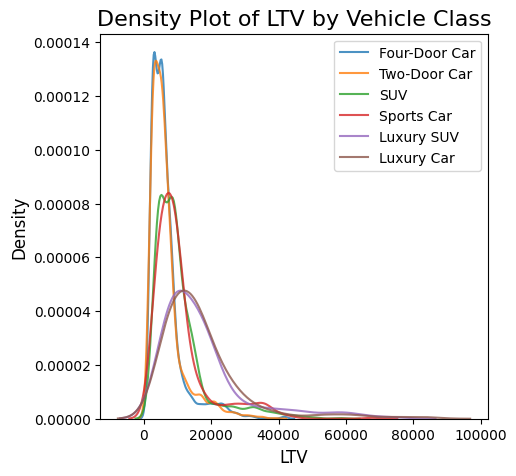

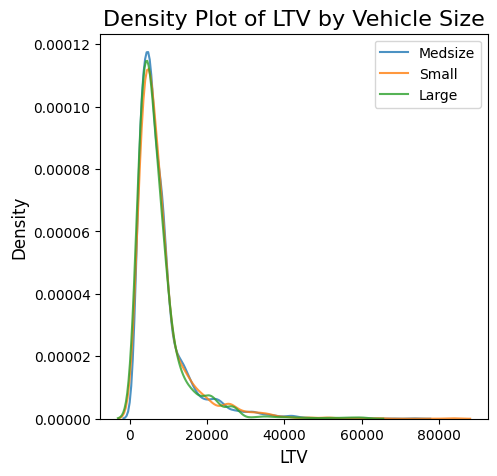

In [28]:
for col in str_cols:
    plt.figure(figsize = (5, 5))

    # Create a list of buildings with more than 100 measurements
    types = df[col].value_counts()
    types = list(types[types.values > 100].index)
    for b_type in types:
      # Select the building type
      subset = df[df[col] == b_type]
      # Density plot of LTV
      sns.kdeplot(subset['Customer Lifetime Value'],
               label = b_type, shade = False, alpha = 0.8);
    # label the plot
    plt.xlabel('LTV', size = 12); plt.ylabel('Density', size = 12);
    plt.title(f'Density Plot of LTV by {col}', size = 16);
    plt.legend()

In [29]:
str_cols

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

Из 14-ти оставшихся категориальных признаков
5 не оказывают заметного влияния на целевую LTV:
* State - штат
* Education - образование
* Gender - пол
* Location code - тип местности в которой проживает пользователь
* Vehicle Size - размер автомобиля

Удалим из df1 лишние неинформативные фичи.

In [36]:
df1.drop(columns=['State', 'Education', 'Gender', 'Location Code', 'Vehicle Size'], inplace=True)
df1.shape

(9134, 15)

In [48]:
str_cols1 = str_cols.copy()

In [49]:
str_cols1.remove('State')
str_cols1.remove('Education')
str_cols1.remove('Gender')
str_cols1.remove('Location Code')
str_cols1.remove('Vehicle Size')

In [37]:
num_cols

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

Чтобы численно оценить степень влияния признаков можно использовать коэффициент корреляции Пирсона. Это мера степени и положительности линейных связей между двумя переменными.  Значение в +1 означает идеальную пропорциональность между значениями признаков и, соответственно, в -1 аналогично, но с отрицательным коэффициентом.

Признаки коррелированные с целевым признаком очень даже помогают нашему алгоритму.

In [38]:
# Find all correlations with the score and sort
correlations_data = df[num_cols].corr()['Customer Lifetime Value'].sort_values()
correlations_data

Number of Open Complaints       -0.036343
Months Since Policy Inception    0.009418
Months Since Last Claim          0.011517
Number of Policies               0.021955
Income                           0.024366
Total Claim Amount               0.226451
Monthly Premium Auto             0.396262
Customer Lifetime Value          1.000000
Name: Customer Lifetime Value, dtype: float64

Ну и наконец, построим Pairs Plot. Это мощный исследовательский инструмент, он позволяет взглянуть на взаимосвязи сразу между несколькими признаками одновременно, а так же на их распределение. В примере при построении использовался модуль seaborn и функция PairGrid. Построен Pairs Plot со scatterplots выше главной диагонали, гистограммами на главной диагонали и 2D kernel density plots, с указанием корреляции, ниже главной диагонали.

In [39]:
# Extract the columns to  plot
plot_data = df[num_cols]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

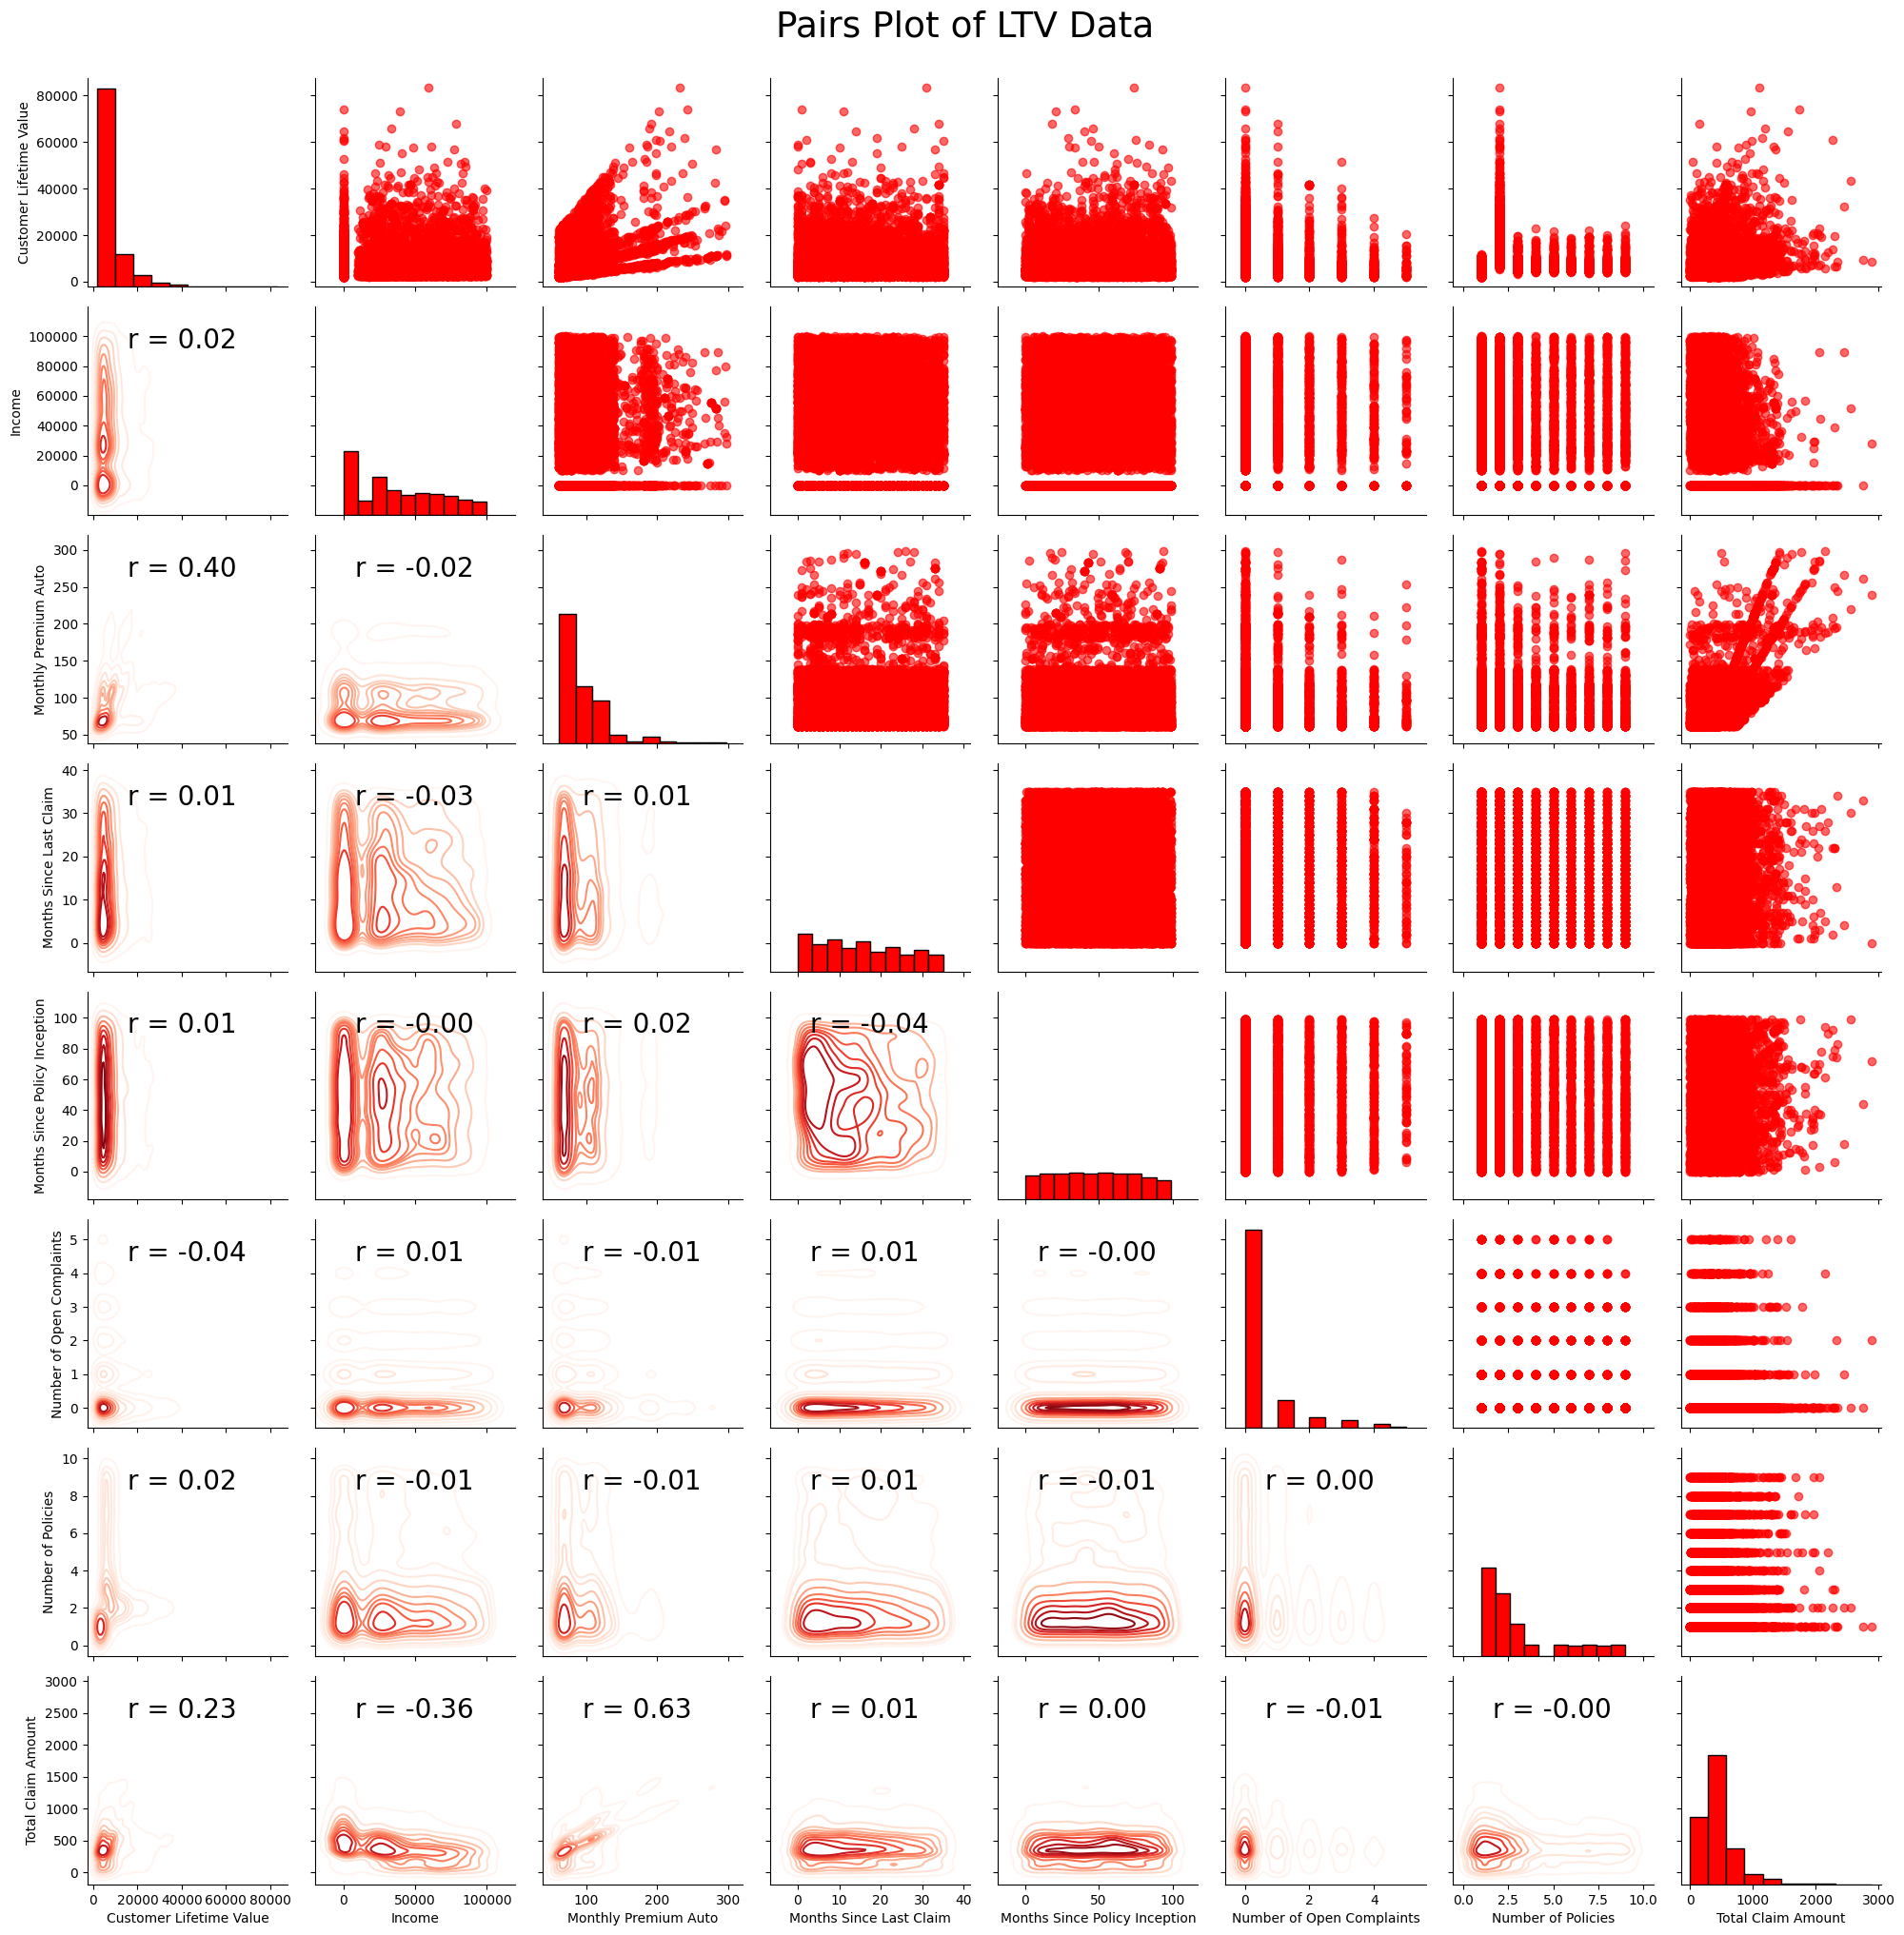

In [40]:
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data) #, size = len(num_cols))

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of LTV Data', size = 27, y = 1.02);

Создание новых признаков (Feature engineering): процесс при котором берутся данные как они есть и затем на основе имеющихся данных конструируются новые признаки. Это может означать изменение непосредственно самих значений, например логарифмирование, взятие корня, или one—hot encoding или кодирование категориальных признаков для того чтобы модель могла их эти признаки обработать. Иногда это создание совершенно новых признаков, которые раньше явным образом в данных не содержались, но, в общем, это всегда добавление в набор новых признаков, полученных из первоначальных данных.

Категориальные признаки имеют от 2 (Coverage, Gender) до 9 (Policy) различных значений.

In [41]:
print(len(str_cols))
str_cols

14


['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

Прокодируем их в df и df1.

In [42]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
for col in str_cols:
    df[col] = le.fit_transform(df[col])
for col in str_cols1:
    df1[col] = le.fit_transform(df1[col])

In [53]:
df.sample(10)

State  Customer Lifetime Value  Response  Coverage  Education  \
6720      4             13798.478710         0         0          0   
1801      3              5682.515346         0         0          2   
2362      1              2369.439009         0         0          0   
1193      0             14349.859910         0         2          0   
6776      1              4845.002948         0         0          0   
8798      1              4794.116328         0         0          1   
9080      1              2230.275142         0         0          3   
8472      3              4660.399573         0         0          0   
7735      3              8390.122077         0         1          3   
3586      1              4755.762589         0         2          3   

      EmploymentStatus  Gender  Income  Location Code  Marital Status  ...  \
6720                 1       0   42780              1               2  ...   
1801                 1       0   36938              2               1  ...   
2362                 4       0       0              1               2  ...   
1193                 1       1   73222              2               1  ...   
6776                 4       0       0              0               1  ...   
8798                 1       0   70012              1               1  ...   
9080                 4       1       0              1               2  ...   
8472                 1       0   89834              0               1  ...   
7735                 4       0       0              1               2  ...   
3586                 1       0   72193              2               1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
6720                             43                          2   
1801                             31                          0   
2362                             35                          0   
1193                             43                          0   
6776                             14                          0   
8798                             33                          0   
9080                             29                          0   
8472                             11                          0   
7735                              3                          0   
3586                             46                          0   

      Number of Policies  Policy Type  Policy  Renew Offer Type  \
6720                   5            1       5                 0   
1801                   3            2       7                 0   
2362                   1            1       4                 0   
1193                   3            1       3                 0   
6776                   6            1       4                 2   
8798                   1            1       5                 3   
9080                   1            1       4                 1   
8472                   1            0       2                 0   
7735                   2            1       5                 0   
3586                   1            1       5                 3   

      Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size  
6720              2          868.800000              2             1  
1801              0          244.801119              0             1  
2362              2          487.345606              0             2  
1193              2          821.516730              3             0  
6776              1          129.165554              5             0  
8798              0          755.198630              3             2  
9080              0          712.712870              0             1  
8472              1           43.155950              3             1  
7735              3          732.340362              0             2  
3586              1          552.646907              0             1  

[10 rows x 22 columns]

Нормализируем все значение, т.е. приведём к одному масштабу

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
X = df2.drop('Customer Lifetime Value', axis = 1)
y = df2['Customer Lifetime Value']

In [57]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [58]:
X_sc

array([[ 1.75371962, -0.40882171, -0.73289946, ..., -0.16963969,
         1.49918077, -0.16668206],
       [-1.35259249, -0.40882171,  0.79199887, ...,  2.400737  ,
        -0.91292371, -0.16668206],
       [ 0.20056356, -0.40882171,  2.31689721, ...,  0.45573376,
         1.49918077, -0.16668206],
       ...,
       [-0.57601447, -0.40882171,  0.79199887, ...,  1.22793667,
        -0.91292371, -0.16668206],
       [-0.57601447, -0.40882171,  0.79199887, ...,  0.88511256,
        -0.91292371, -2.0278971 ],
       [-0.57601447, -0.40882171,  0.79199887, ..., -0.22200449,
         1.49918077, -0.16668206]])

## Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

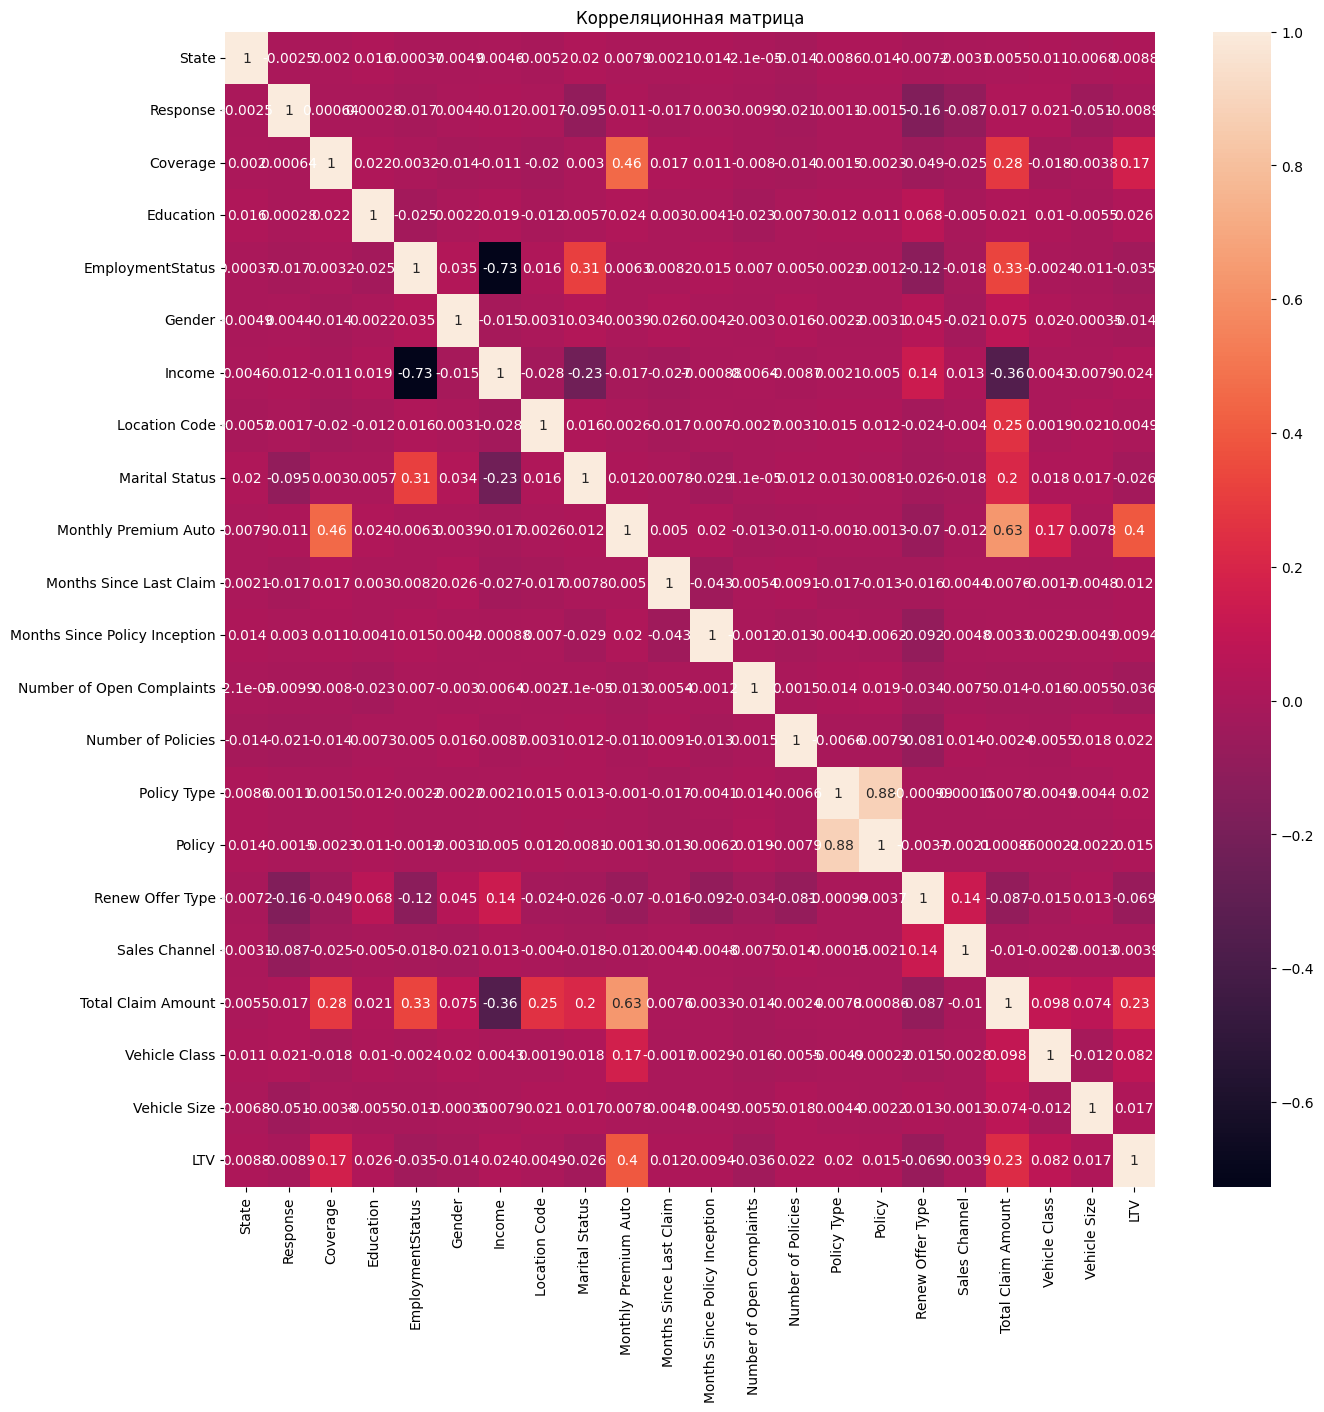

In [59]:
# Преобразуем матрицу признаков в DataFrame
data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
data_trasformed['LTV'] = y
# Создаем корреляционную матрицу
corr_m = data_trasformed.corr()

# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (15, 15))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

Показатели:
* Policy Type - тип страховки
* Policy - страховка

и
* EmploymentStatus - трудоустройство
* Income - доход

очень сильно коррелируют друг с другом (что объяснимо).

Удалим из df1 Policy - страховка, Income - доход

In [60]:
df1.drop(columns=['Policy', 'Income'], inplace=True)
df1.shape

(9134, 13)

In [61]:
str_cols1.remove('Policy')
num_cols1.remove('Income')

Мы удалили из df1 несущественные признаки.

Выбор признаков (Feature selection): процесс выбора наиболее релевантных признаков. При этом из набора удаляются признаки для того чтобы модель уделила больше внимания и ресурсов первостепенным признакам, а также это помогает получить более легкоинтерпретируемые результаты. В общем, это чистка набора при которой остаются только наиболее важные для нашей задачи данные.

В машинном обучении модель обучается целиком на данных которые мы подаем на вход модели, так что важно быть уверенным в том что все ключевые данные для эффективного решения задачи у нас есть. Если данных способных нам обеспечить решение задачи у нас нет, то какой бы модель не была хорошей, научить мы её ничему не сможем.

## Обучение различных моделей

Наша цель — предсказать LTV пользователя (Customer Lifetime Value) и понять, какие признаки оказывают на него сильнейшее влияние.

Данные уже содержат в себе LTV, так что задача относится к классу задач машинного обучения с учителем, и представляет собой построение регрессии:

Обучение с учителем: у нас есть как все необходимые признаки, на основе которых выполняется предсказание, так и сам целевой признак.

Регрессия: будем считать, что LTV — это непрерывная величина.

В конечном итоге нужно построить как можно более точную модель,  которая на выходе дает легкоинтерпретируемые результаты, т.е. мы сможем понять на основании чего модель делает тот или иной вывод. Грамотно поставленная задача уже содержит в себе решение.

Целевая переменная - Customer Lifetime Value (LTV) - пожизненная ценность клиента


Выделим матрицу признаков и вектор с целевой переменной

In [62]:
X = df.drop('Customer Lifetime Value', axis = 1)
y = df['Customer Lifetime Value']

In [63]:
X1 = df1.drop('Customer Lifetime Value', axis = 1)
y1 = df1['Customer Lifetime Value']

Уже выполнена чистка данных, предварительный анализ, оставлены только полезные признаки. Последний шаг перед началом обучения модели — определение критерия, по которому можно понять, есть ли хоть какой-то толк от нашего алгоритма. Например, можно сравнить результат работы модели с попыткой просто угадать целевой признак, ничем особым не руководствуясь. Если наш алгоритм работает хуже, чем неосмысленный перебор возможных значений целевого признака, тогда стоит попробовать другой подход, возможно, даже не связанный с машинным обучением.

Для задач регрессии таким возможным критерием можем выступать подстановка медианных значений целевого признака в качестве догадки. Хотя это довольно низкий порог для большинства алгоритмов.

В качестве метрики я решил использовать среднее абсолютное отклонение (mean absolute error (MAE)), название дает исчерпывающее представление о том, что это за величина. Метрика довольно легко рассчитывается, и она наглядна. Мне нравится совет Andrew Ng, который рекомендует выбрать какую-то одну и на протяжении выполнения всех оценок пользоваться ей.

До расчета упомянутого критерия, нужно разделить выборку на обучающую и проверочную (тестовую):

Обучающая выборка это набор который подается на вход модели в процессе обучения вместе с ответами, с целью научить модель видеть связь между этими признаками и правильным ответом
    
Тестовая выборка используется для проверки модели. Модель не получает целевой признак на вход и, более того, должна предсказать его величину используя значения остальных признаков. Эти предсказания потом сравниваются с реальными ответами.

Используем 70% записей для обучения и на 30% проверим работу:

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)


In [67]:
# Function to calculate mean absolute error
def mae(y_true, y_d):
    return np.mean(abs(y_true - y_d))

In [68]:
baseline_guess = np.median(y)
print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 5780.18
Baseline Performance on the test set: MAE = 4128.9734


Как видно наша модель ошибается в среднем на 20%

In [70]:
from sklearn.linear_model import LinearRegression

In [98]:
# Создаем объект стандартизации
scaler = StandardScaler()
# Применяем стандартизацию к обучающим данным и параллельно обучаем шкалировщик
X_train_scaled = scaler.fit_transform(X_train)
# Применяем ту же стандартизацию к тестовым данным (без повторного обучения)
X_test_scaled = scaler.transform(X_test)
# Создаем и обучаем модель линейной регрессии на отмасштабированных данных
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [97]:
# Оцениваем производительность модели
score = model.score(X_test_scaled, y_test)
# Получаем коэффициенты регрессии
coefficients = model.coef_
intercept = model.intercept_
print("Производительность модели (R-squared):", score)
print("Коэффициенты регрессии:", coefficients)
print("Свободный член:", intercept)

Производительность модели (R-squared): 0.15207242655487696
Коэффициенты регрессии: [-187.00570504 -233.0568155  -141.41042832  210.54555036 -186.56463876
 -101.38841517   88.04520921 -199.5200649   -82.50714316 2477.16639995
  -85.92048542   37.67472905 -348.8831354   153.62008471  270.21920218
  -51.40404406 -310.5750092   128.16010399  328.90233192   50.41673701
   11.38880284]
Свободный член: 7901.994450340511


In [99]:
# Линейная регрессия
model = LinearRegression().fit(X, y)

In [101]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.16510347520548874
intercept: 531.5724624587301
slope: [ 2.84755790e+01 -4.48378795e+02 -1.83788961e+02  9.30832193e+01
 -1.06434785e+02 -1.44558885e+02  2.17788607e-03  1.03558981e+02
 -2.37276408e+02  8.26769736e+01  6.79664192e+00 -7.81127374e-01
 -2.47878113e+02  6.32701317e+01  4.48588159e+02 -4.79852636e+01
 -3.48507898e+02  2.35600841e+01 -5.82439982e-01  4.64930252e+01
  1.86679831e+02]


In [104]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[6608.4941723  6923.71154915 9533.18329248 ... 5579.35382241 7668.56737742
 5017.03708371]


In [102]:
model1 = LinearRegression().fit(X1, y1)

In [103]:
r_sq1 = model1.score(X1, y1)
print('coefficient of determination:', r_sq1)
print('intercept:', model1.intercept_)
print('slope:', model1.coef_)

coefficient of determination: 0.16416348803106418
intercept: 1110.6253462727263
slope: [-463.77699516 -180.34756259 -152.86086177 -235.00279212   82.24631874
 -250.41884602   64.36772513  310.47546016 -339.84817077   22.75328873
   -0.48503824   45.91367928]


Как видно, лучший результат показала модель медианных значений целевого признака в качестве догадки. Хотя это довольно низкий порог.